In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import astropy.units as u
import os
import pandas as pd
from astroquery.jplsbdb import SBDB

import phunk
from sbpy import photometry as phot
import lmfit
from scipy.interpolate import CubicSpline
from scipy import stats

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pickle
from matplotlib import colormaps

## custom functions
from Asteroid_pickle import *
from asteroid_ls import *

# Data reduction part


In [2]:
# Reading the files inside

file_path = r"C:\Users\nagai\Documents\Asteroids_BF_2\AstBFT08oj\1205-4267.xlsx"
df = pd.read_excel(file_path)

Asteroid_list_df = df["Aster."]

All_obs = df.iloc[:, 1::2]

# All the observatories available
All_obs_cleaned = All_obs.iloc[:, :-1]
obj_names = All_obs_cleaned.columns
print (obj_names)

Index(['T08o', '703G', '703V', 'C57G', 'D29R', 'F51w', 'G45r', 'P07G', 'G96G',
       'G96V', 'I41r', 'M22o', 'T05c', 'T05o', 'T08c', 'W68o', 'I41g', 'T05w',
       'F52w', 'T08w', 'W68c', 'Q68R', 'G69R', '689V', 'Citi  '],
      dtype='object')


In [3]:
# Selecting the asteroid
Asteroid_number = 4303

# For internal file: must insert the path you have the file
file_path = r"C:\Users\nagai\Downloads\phases_and_phi.txt"
# reference table - where the data is stored for hte specific asteroid
path = r"C:\Users\nagai\Documents\Asteroids_BF_2\AstBFT08oj\T08oBF\\"
# The name of the excel file
file_name = r"{}-excelBF.xlsx".format(Asteroid_number)


In [4]:
xls = pd.ExcelFile(path+file_name)
Sheet_names = xls.sheet_names
#print (Sheet_names)

# Here you must insert what observatories or columns you want to remove from the analysis!
# If not changed otherwise, you read every second column thereafter
remove_obs = ["Data precision", 'Raw data', 'mpj', 'Sheet8', "Periods", "704"]

idx_remove = np.where(np.isin(Sheet_names, remove_obs))[0]
reduced_obs = np.delete(Sheet_names, idx_remove)[::2] # Takes every second column
print ("Observatories that will be analysed: ", reduced_obs)

Observatories that will be analysed:  ['P07G' 'D29R' '703G' '703V' 'M22o' 'C57G' 'W68o' 'G96G' 'G96V' 'G45r'
 'F51w' 'T08o' 'T05c' 'T05o']


In [5]:
# Initiating the generation of the dataset
DatasetGen = DatasetGenerator(path, file_name, Asteroid_number, reduced_obs)

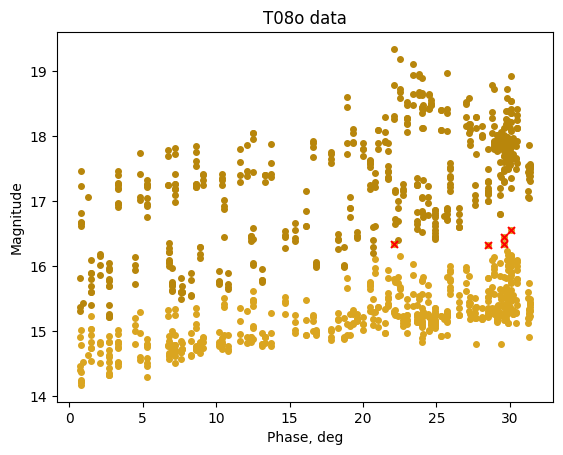

Not fixed
Absolute magnitude: 14.64
G1 = 0.681, G2 = 0.4017985


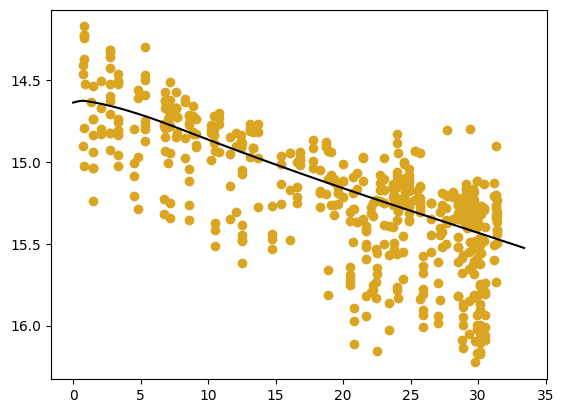

In [6]:
# Reference phase curve. For now only computes with HG1G2

H_val_2, G1_val, G2_val = DatasetGen.reference_obs_comp("T08o", method = "HG1G2")

Saving figure!


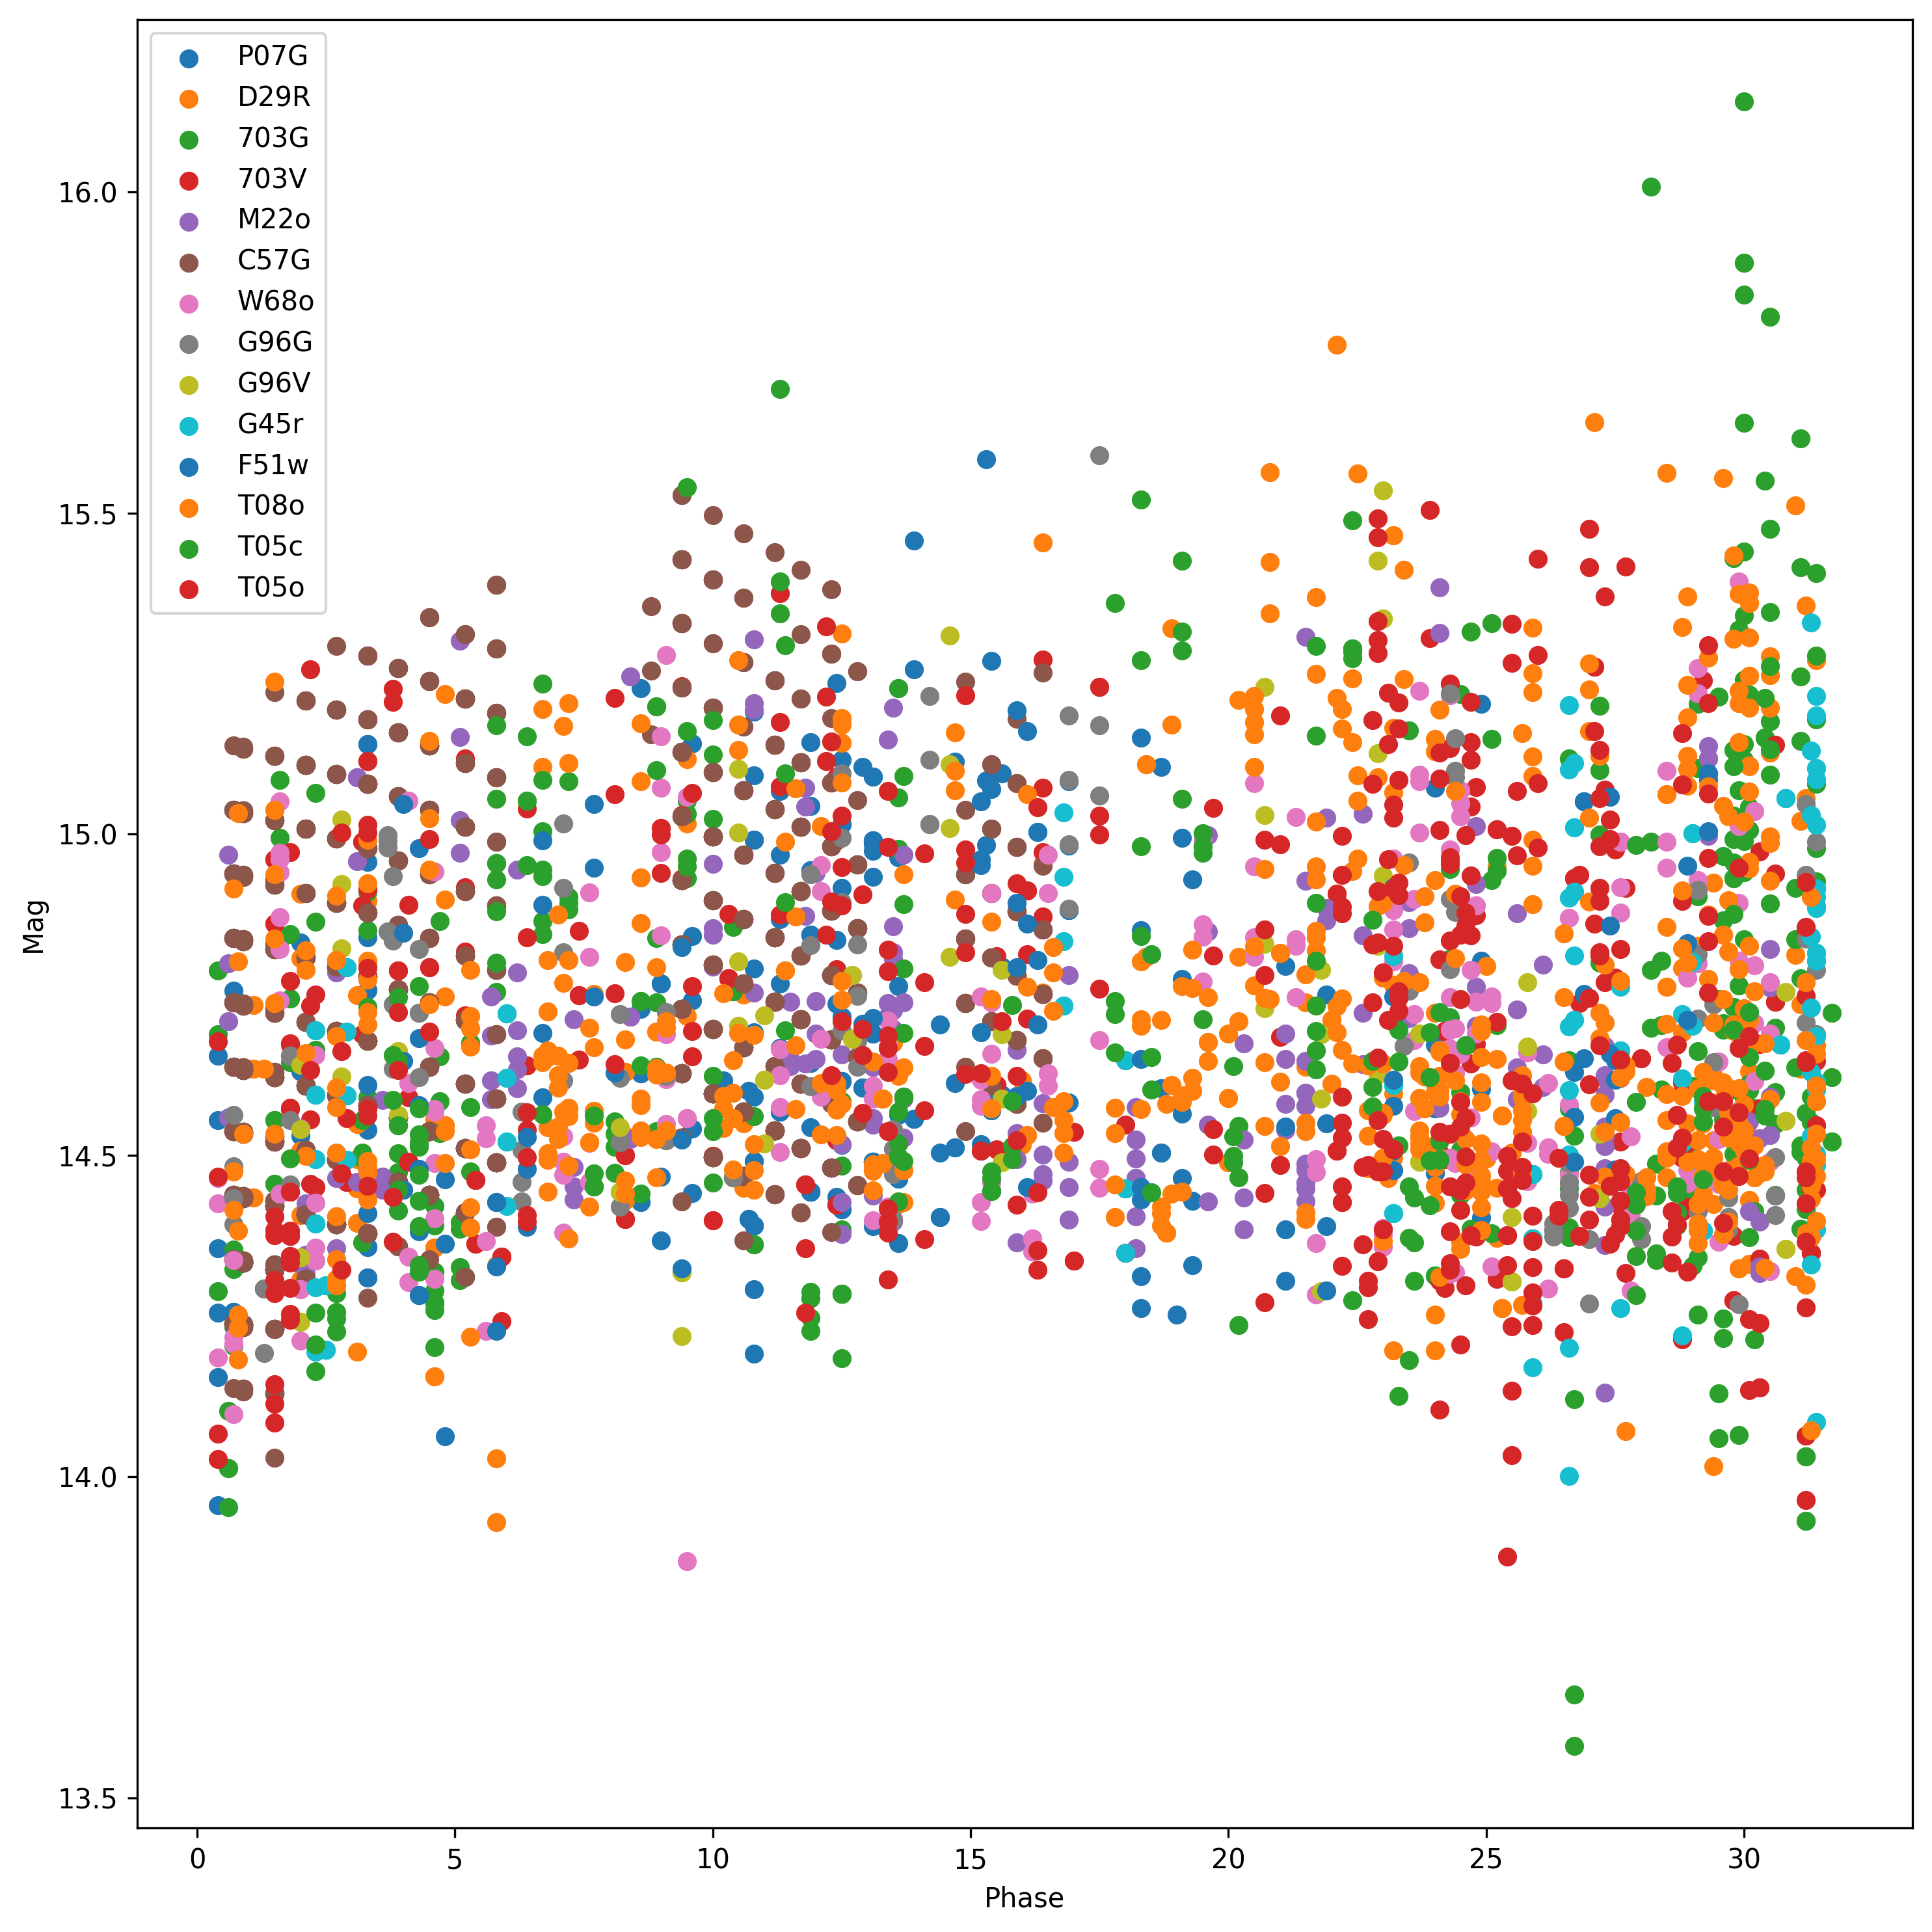

Saving the file in location: C:\Users\nagai\Documents\Asteroid work\Test folder\\


In [7]:
# You can choose to save figure: save_figure = True and save_figures = "your-path"
# You can choose to save the dataset: save_file = True and save_path = "your-path"


dict_sheets = DatasetGen.all_obs_comb(H_val_2, G1_val = G1_val, G2_val = G2_val, method = "HG1G2", save_figure = True,
                        save_figures = r"C:\Users\nagai\Documents\Asteroid work\Test folder\\",
                     save_path = r"C:\Users\nagai\Documents\Asteroid work\Test folder\\",
                        save_file = True)

# Asteroid period with Lomb-Scargle

In [8]:
# How to insert the number of the analyzed asteroid, as well as the previosuly computed dicts

LS_gen = AsteroidLSPipeline(dict_sheets, Asteroid_number)

P07G
D29R
703G
703V
M22o
C57G
W68o
G96G
G96V
G45r
F51w
T08o
T05c
T05o


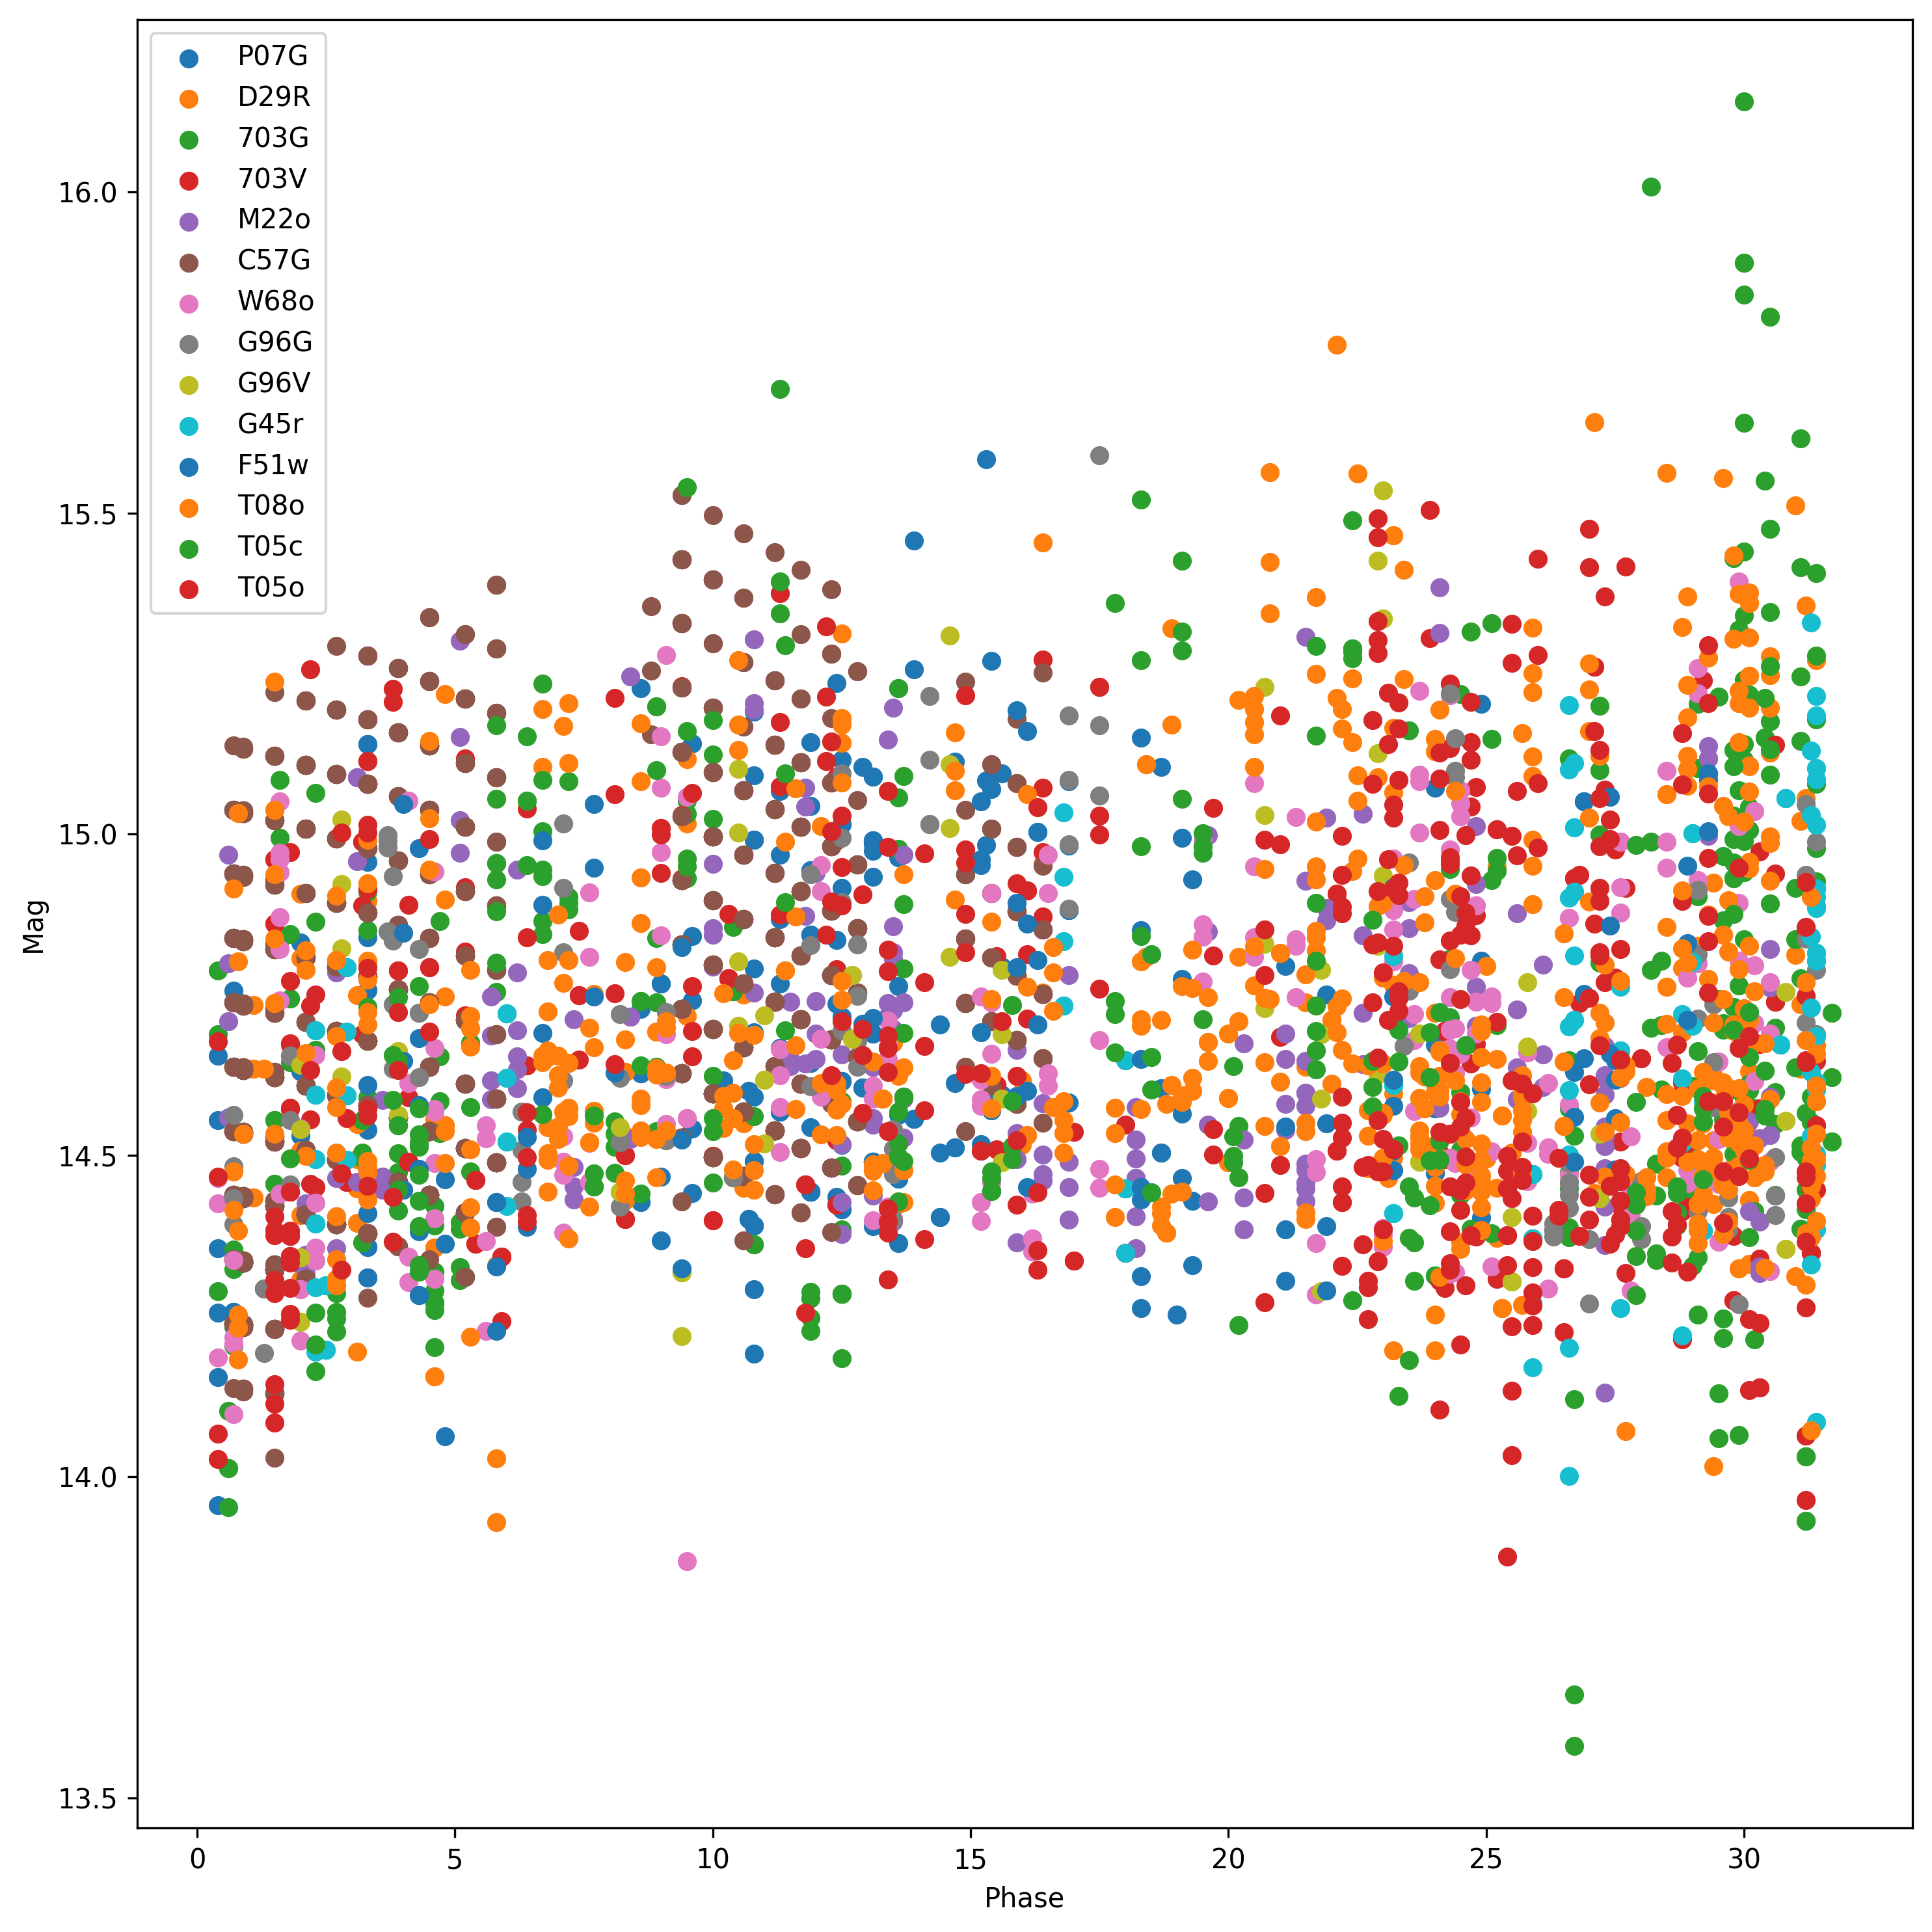

In [9]:
# Reading in the data again

ts, ys = LS_gen.reading_data()

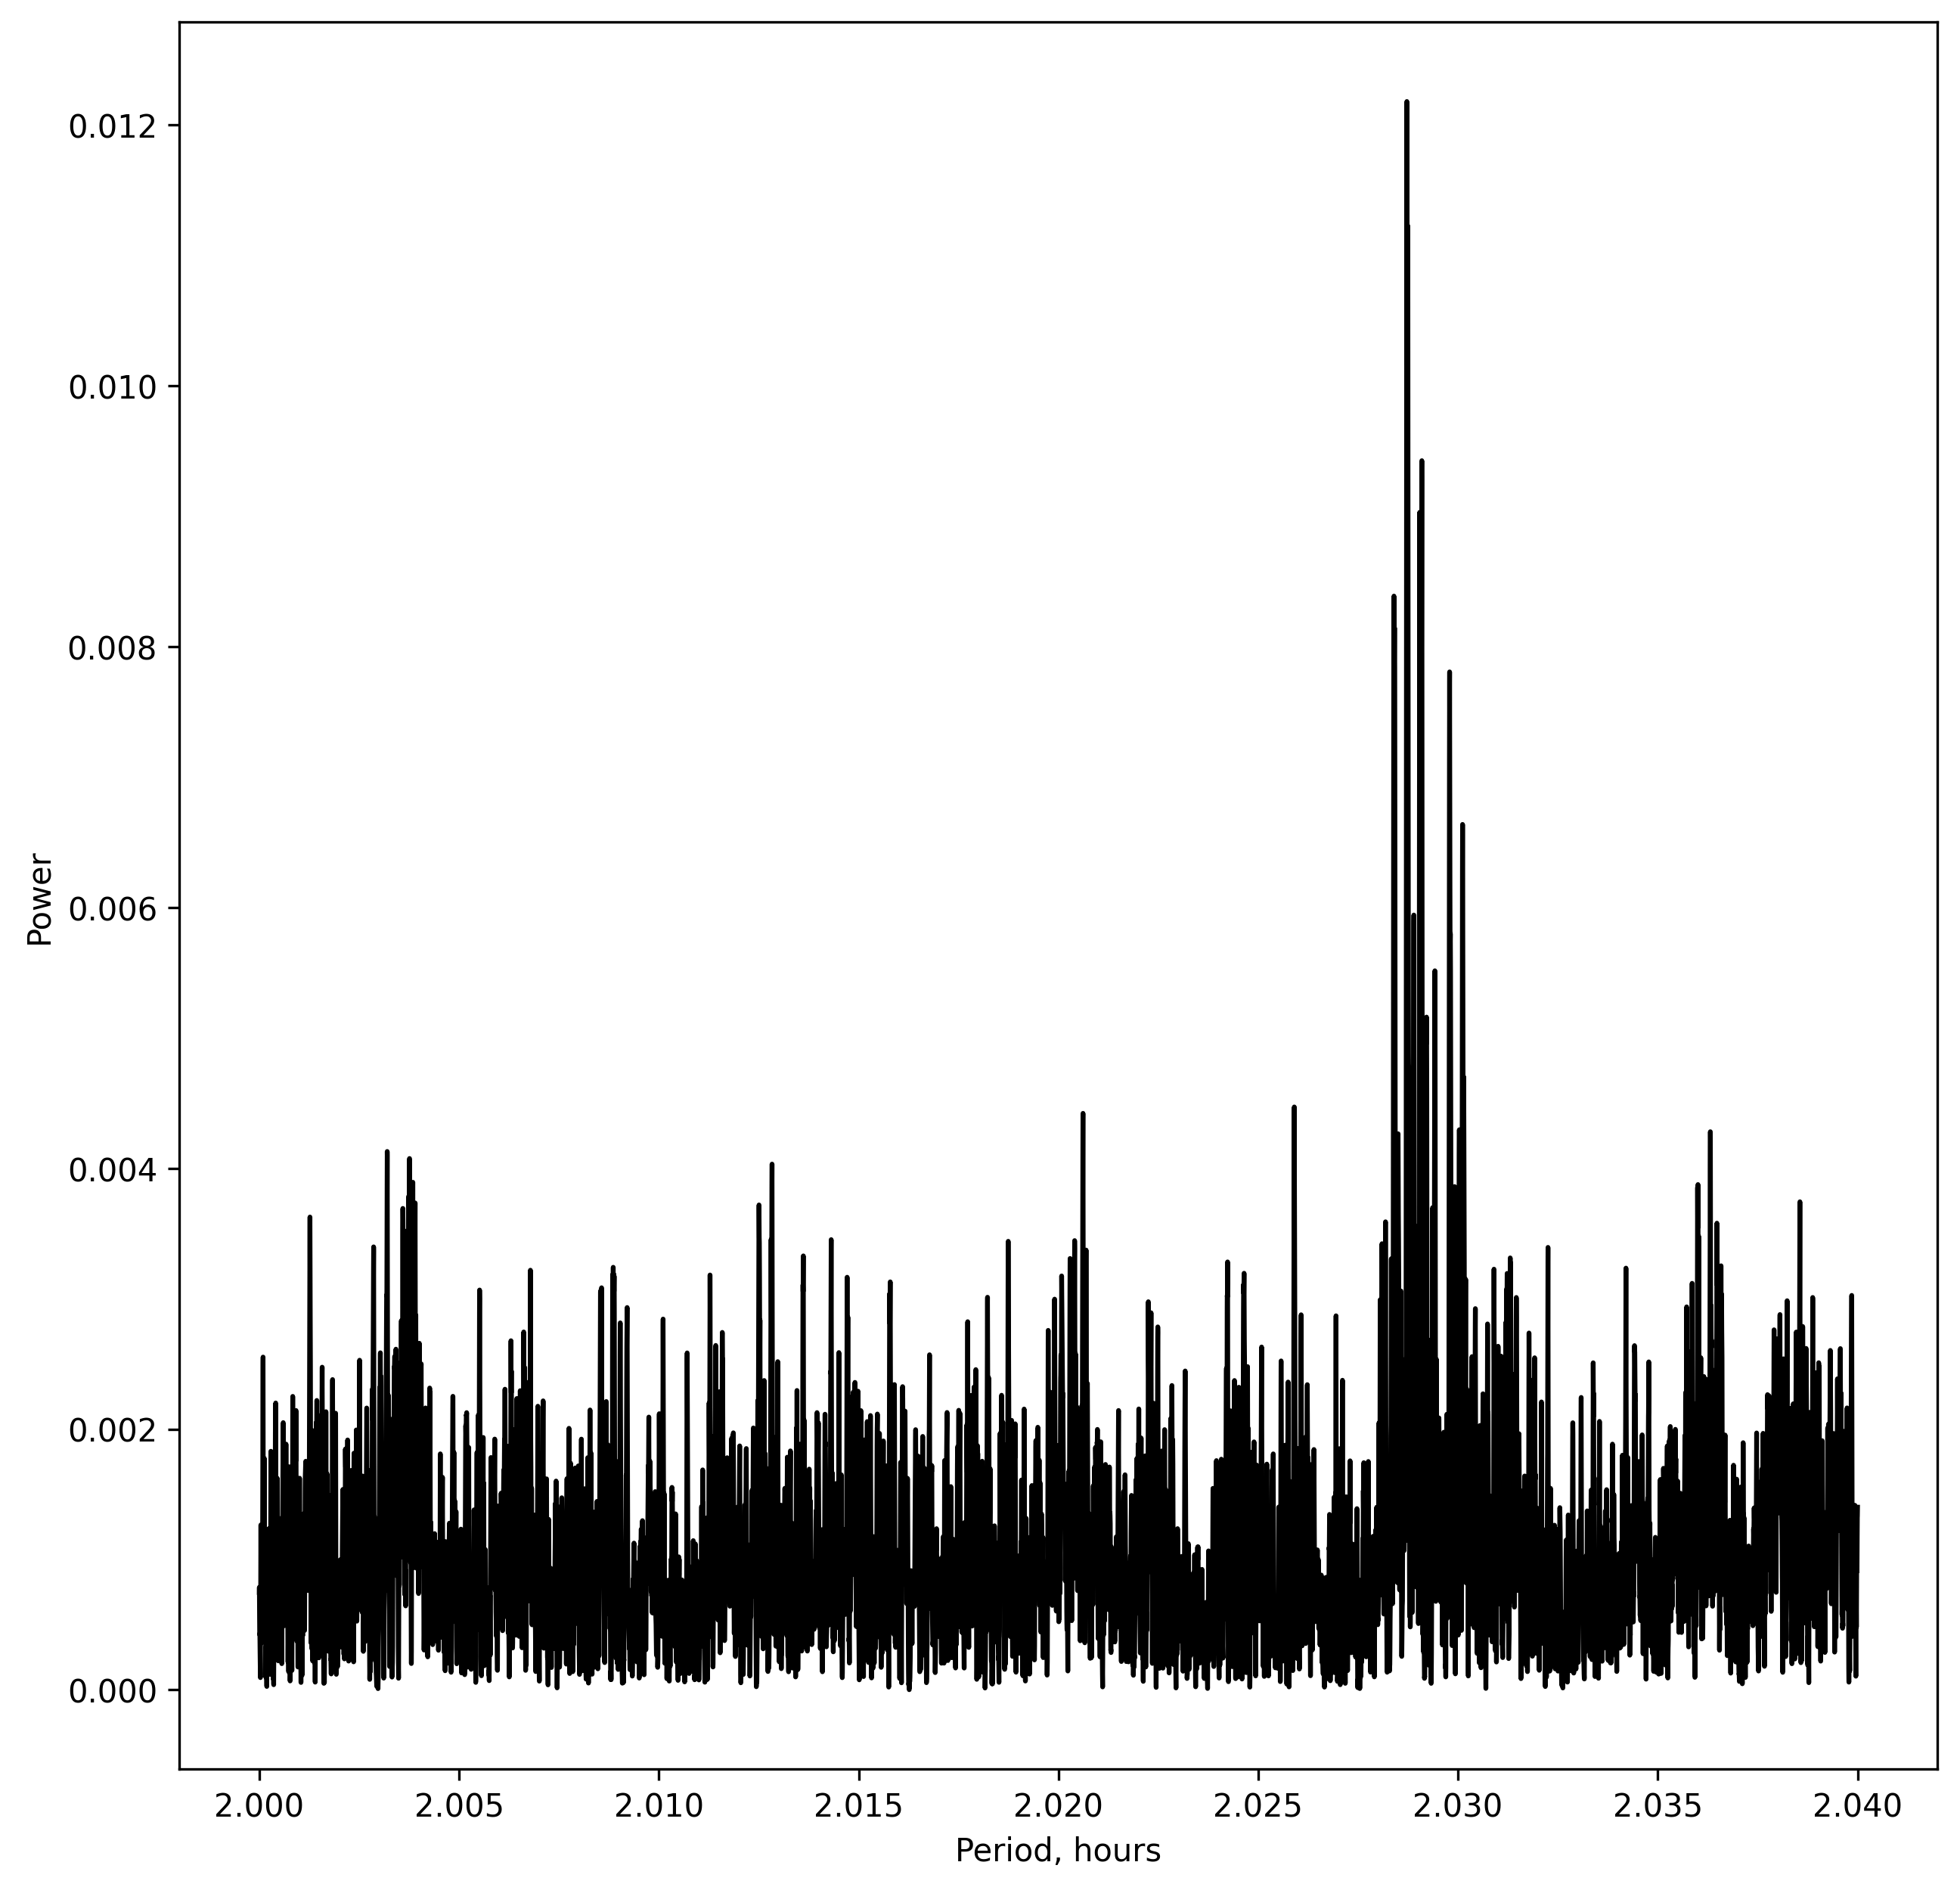

TOP20 results from the power specrum
      Period     power
0   2.028721  0.012180
1   2.028719  0.012145
2   2.028722  0.012008
3   2.028717  0.011882
4   2.028724  0.011676
5   2.028716  0.011397
6   2.028725  0.011258
7   2.028741  0.011228
8   2.028743  0.011228
9   2.028740  0.011108
10  2.028745  0.011087
11  2.028738  0.010898
12  2.028727  0.010833
13  2.028746  0.010796
14  2.028714  0.010720
15  2.028737  0.010643
16  2.028729  0.010476
17  2.028735  0.010399
18  2.028748  0.010351
19  2.028730  0.010243


In [10]:
# Computing the Lomb-Scargle
# Best parameters to choose:
#     nterms = 2
#     maxf = (1/(0.5/24)
#     minf = 1/(50/24)
#     samples_per_peak = 30

frequency, power, df_results = LS_gen.LS_initiate(ts, ys, nterms = 2, maxf =1/(2.00/24), minf = 1/(2.04/24), samples_per_peak=15,
                                                 save_bool = "False", path_to_LS = r"C:\Users\nagai\Documents\LS_data\\")

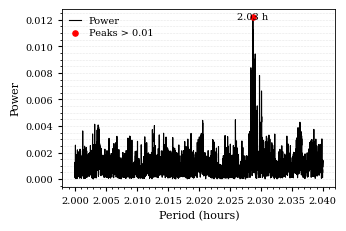

In [11]:
# Finding the peaks in the LS spectra
# Important to manually, by eye, insert the threshold for peaks: 0.01
# If there are multiple peaks around the same maxima, increase the distance. Usually you can start increasing by 10x

Peaks_x = LS_gen.find_peaks(frequency, power, height = 0.01, distance = 1000, save_fig = False, save_figues = "path")

C:\Users\nagai\Documents\Asteroid work\asteroid_ls.py:278: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=1)


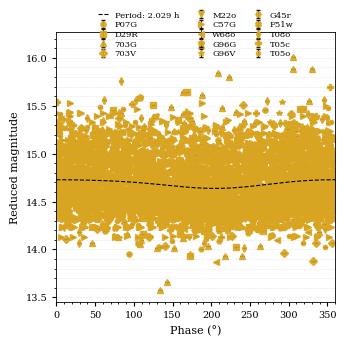

In [12]:
# peak_idx = the peak you choose to plot

LS_gen.visualize_ls(frequency, Peaks_x, peak_idx = 0, save_fig = False, save_figures = "path")